# 音声感情分析結果の可視化

このノートブックでは、音声感情分析の結果（JSON形式）を読み込んで、グラフ形式で可視化します。

## 機能
- ✅ JSON形式の結果ファイルを読み込み（モデルの再読み込み不要）
- ✅ 感情分布の可視化（円グラフ、棒グラフ）
- ✅ 信頼度の分析（ヒストグラム、箱ひげ図）
- ✅ ファイルごとの感情スコア（ヒートマップ）
- ✅ 時系列での感情変化（折れ線グラフ）
- ✅ 詳細な統計レポート

## 1. ライブラリのインポートと設定

In [2]:
# 必要なライブラリのインポート
import json
import sys
from pathlib import Path
from typing import Dict, List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# プロジェクトのルートディレクトリをパスに追加
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

# 日本語フォント設定（Windows）
plt.rcParams['font.family'] = 'MS Gothic'
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け対策

# グラフのスタイル設定
sns.set_style("whitegrid")
sns.set_palette("husl")

# 図の表示サイズ設定
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

print("✅ ライブラリのインポート完了")

✅ ライブラリのインポート完了


## 2. 音声感情分析の実行（初回のみ）

既にJSONファイルがある場合は、この手順をスキップできます。

In [2]:
# 音声感情分析の実行（初回のみ）
# 既にJSONファイルがある場合はこのセルをスキップしてください

from analyze_emotion_batch import analyze_directory

# 設定
INPUT_DIR = r"C:\Users\usago\python\audio-data\zundamon\ROHAN4600_zumndamon_normal_synchronized_wav"
OUTPUT_DIR = str(project_root / "emotion_results")

# 分析実行
print("🎭 音声感情分析を開始します...")
print(f"入力: {INPUT_DIR}")
print(f"出力: {OUTPUT_DIR}\n")

analyze_directory(
    input_dir=INPUT_DIR,
    output_dir=OUTPUT_DIR,
    pattern="*.wav",
    recursive=False,
    device="cpu",  # GPU利用可能なら"cuda"に変更
    output_format="both"
)

print("\n✅ 分析完了！結果ファイルを確認してください。")

c:\Users\usago\python\text-to-speach\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🎭 音声感情分析を開始します...
入力: C:\Users\usago\python\audio-data\zundamon\ROHAN4600_zumndamon_normal_synchronized_wav
出力: c:\Users\usago\python\text-to-speach\emotion_results


🔍 音声ファイルを検索中...

【音声感情分析 - 一括処理】
入力ディレクトリ: C:\Users\usago\python\audio-data\zundamon\ROHAN4600_zumndamon_normal_synchronized_wav
出力ディレクトリ: c:\Users\usago\python\text-to-speach\emotion_results
対象ファイル数: 4600個
ファイルパターン: *.wav
出力形式: both

🔧 音声感情認識モデルを初期化中...
   モデル: Bagus/wav2vec2-xlsr-japanese-speech-emotion-recognition
   デバイス: cpu


Loading weights: 100%|██████████| 422/422 [00:00<00:00, 1397.24it/s, Materializing param=wav2vec2.masked_spec_embed]                                            
Wav2Vec2ForSequenceClassification LOAD REPORT from: Bagus/wav2vec2-xlsr-japanese-speech-emotion-recognition
Key                        | Status     | 
---------------------------+------------+-
classifier.dense.bias      | UNEXPECTED | 
classifier.out_proj.weight | UNEXPECTED | 
classifier.dense.weight    | UNEXPECTED | 
classifier.out_proj.bias   | UNEXPECTED | 
projector.weight           | MISSING    | 
classifier.weight          | MISSING    | 
projector.bias             | MISSING    | 
classifier.bias            | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


✅ モデルの読み込み完了

デバイス情報:
  device: cpu
  cuda_available: False


🎭 感情分析を開始します...



感情分析処理中: 100%|██████████| 4600/4600 [31:52<00:00,  2.41it/s]

✅ JSON結果を保存: c:\Users\usago\python\text-to-speach\emotion_results\emotion_analysis_20260126_230522.json
✅ CSV結果を保存: c:\Users\usago\python\text-to-speach\emotion_results\emotion_analysis_20260126_230522.csv

【分析結果サマリー】
総ファイル数: 4600個
成功: 4600個
エラー: 0個
総音声時間: 30826.0秒 (513.8分)
総処理時間: 1899.6秒
処理速度: 16.23x (リアルタイム比)
平均信頼度: 28.86%

【感情分布】
  angry     : 2275個 ( 49.5%) ████████████████████████
              平均信頼度: 29.54%, 合計時間: 15088.8秒
  happy     : 1165個 ( 25.3%) ████████████
              平均信頼度: 28.75%, 合計時間: 7812.4秒
  sad       :  594個 ( 12.9%) ██████
              平均信頼度: 27.55%, 合計時間: 4220.4秒
  neutral   :  566個 ( 12.3%) ██████
              平均信頼度: 27.76%, 合計時間: 3704.5秒

✅ 処理完了！

✅ 分析完了！結果ファイルを確認してください。


## 3. JSONファイルの読み込み

保存されたJSONファイルを読み込みます。**モデルのロードは不要です。**

In [3]:
# JSONファイルの読み込み（最新のファイルを自動選択）
def get_latest_json(output_dir: str = "emotion_results") -> Path:
    """最新のJSON結果ファイルを取得"""
    output_path = project_root / output_dir
    if not output_path.exists():
        raise FileNotFoundError(f"出力ディレクトリが見つかりません: {output_dir}")
    
    json_files = list(output_path.glob("emotion_analysis_*.json"))
    if not json_files:
        raise FileNotFoundError(f"JSONファイルが見つかりません: {output_dir}")
    
    # 最新のファイルを返す
    return max(json_files, key=lambda p: p.stat().st_mtime)

# JSONファイルを読み込み
json_file = get_latest_json("emotion_results")
print(f"📂 読み込むファイル: {json_file.name}")

with open(json_file, 'r', encoding='utf-8') as f:
    data = json.load(f)

# データの概要を表示
print(f"\n📊 データ概要:")
print(f"   作成日時: {data['metadata']['created_at']}")
print(f"   総ファイル数: {data['summary']['total_files']}個")
print(f"   成功: {data['summary']['success_count']}個")
print(f"   エラー: {data['summary']['error_count']}個")
print(f"   総音声時間: {data['summary']['total_duration']:.1f}秒 ({data['summary']['total_duration']/60:.1f}分)")
print(f"   平均信頼度: {data['summary']['average_confidence']:.2%}")

📂 読み込むファイル: emotion_analysis_20260126_230522.json

📊 データ概要:
   作成日時: 2026-01-26T23:05:22.837811
   総ファイル数: 4600個
   成功: 4600個
   エラー: 0個
   総音声時間: 30826.0秒 (513.8分)
   平均信頼度: 28.86%


## 4. データをDataFrameに変換

In [4]:
# 結果をDataFrameに変換
df = pd.DataFrame(data['results'])

# エラーがあるデータを除外
df_valid = df[df['error'].isna()].copy()

print(f"✅ 有効なデータ数: {len(df_valid)}個\n")

# 感情スコアを個別の列に展開
emotions_df = pd.DataFrame(df_valid['emotions'].tolist())
df_valid = pd.concat([df_valid, emotions_df], axis=1)

# 感情ラベルの日本語対応
emotion_labels_jp = {
    'angry': '怒り',
    'happy': '喜び',
    'neutral': '中立',
    'sad': '悲しみ'
}

# 最初の5行を表示
print("📋 データの先頭5行:")
display(df_valid[['filename', 'dominant_emotion', 'confidence', 'angry', 'happy', 'neutral', 'sad']].head())

✅ 有効なデータ数: 4600個

📋 データの先頭5行:


,filename,dominant_emotion,confidence,angry,happy,neutral,sad
0,ROHAN4600_0001.wav,angry,0.280642,0.280642,0.204039,0.247448,0.267872
1,ROHAN4600_0002.wav,angry,0.302007,0.302007,0.199989,0.235003,0.263001
2,ROHAN4600_0003.wav,angry,0.294796,0.294796,0.207932,0.228454,0.268818
3,ROHAN4600_0004.wav,sad,0.260089,0.254575,0.252004,0.233332,0.260089
4,ROHAN4600_0005.wav,angry,0.302495,0.302495,0.192936,0.240245,0.264323


## 5. 感情分布の可視化（円グラフ）

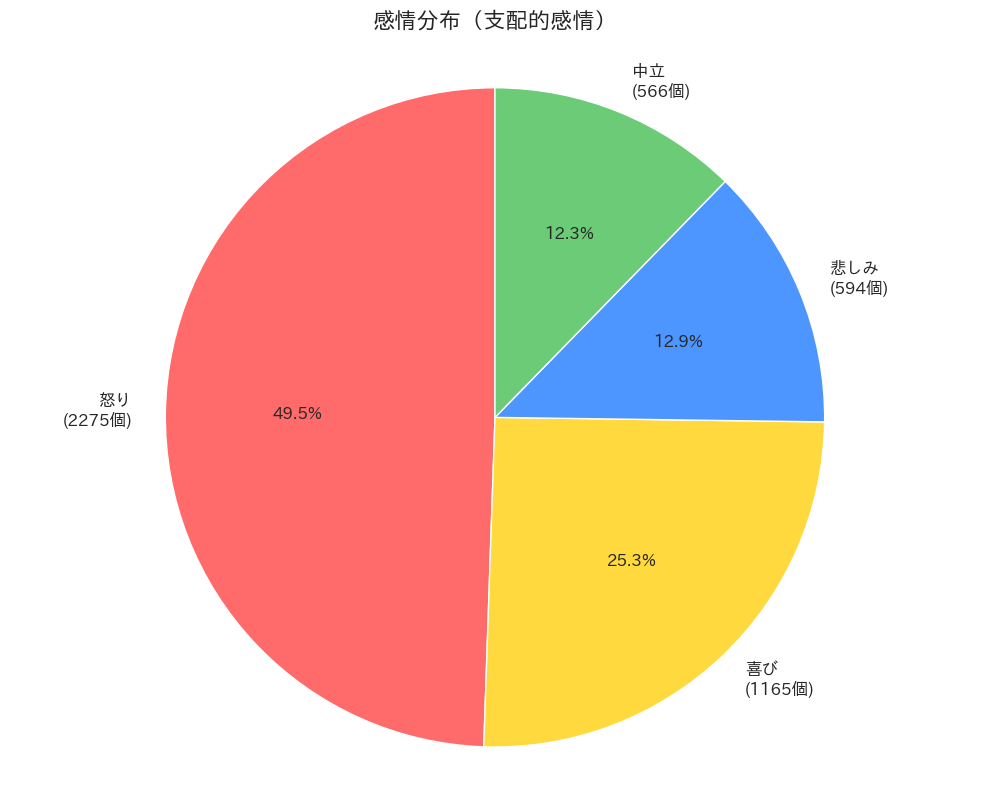


📊 感情分布の詳細:
  怒り    : 2275個 ( 49.5%)
  喜び    : 1165個 ( 25.3%)
  悲しみ   :  594個 ( 12.9%)
  中立    :  566個 ( 12.3%)


In [6]:
import japanize_matplotlib
# 感情分布の円グラフ
emotion_counts = df_valid['dominant_emotion'].value_counts()

# カラーパレット
emotion_colors = {
    'angry': '#FF6B6B',
    'happy': '#FFD93D',
    'neutral': '#6BCB77',
    'sad': '#4D96FF'
}
colors = [emotion_colors.get(e, '#999999') for e in emotion_counts.index]

# 円グラフの作成
labels = [f"{emotion_labels_jp.get(e, e)}\n({count}個)" for e, count in emotion_counts.items()]

plt.figure(figsize=(10, 8))
plt.pie(emotion_counts.values, labels=labels, colors=colors, autopct='%1.1f%%', 
        startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('感情分布（支配的感情）', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

# 詳細表示
print("\n📊 感情分布の詳細:")
for emotion, count in emotion_counts.items():
    percentage = count / len(df_valid) * 100
    print(f"  {emotion_labels_jp.get(emotion, emotion):6s}: {count:4d}個 ({percentage:5.1f}%)")

## 6. 感情分析の詳細統計（棒グラフ×4）

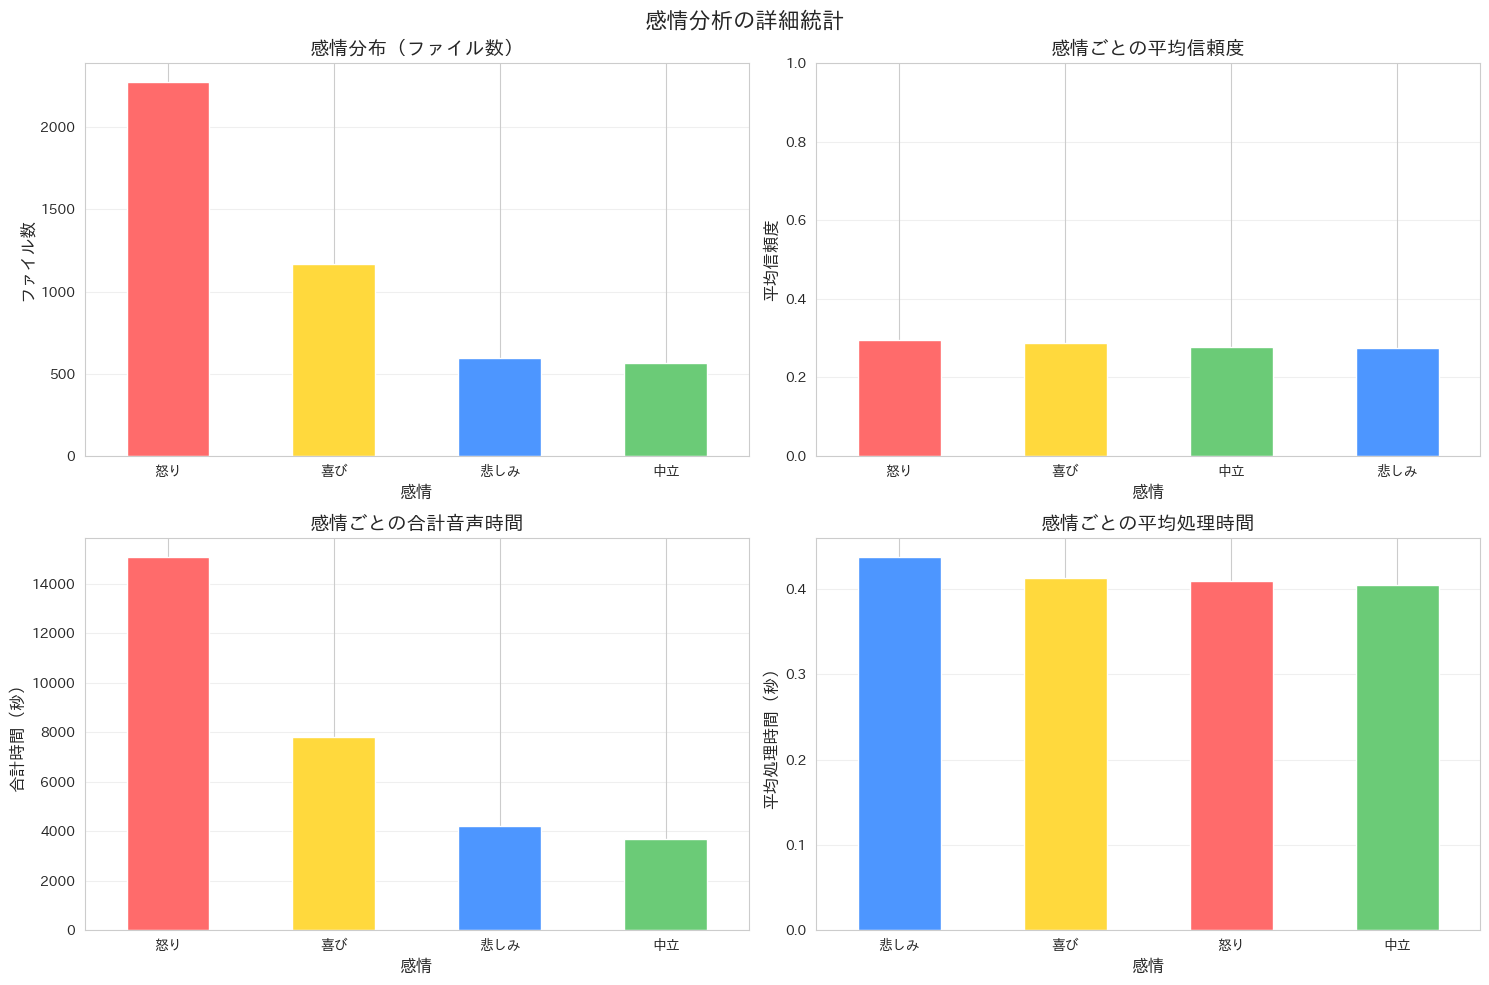

In [7]:
# 感情ごとの統計情報（4つのグラフ）
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('感情分析の詳細統計', fontsize=16, fontweight='bold')

# 1. 感情分布（カウント）
ax1 = axes[0, 0]
emotion_counts.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('感情分布（ファイル数）', fontsize=14, fontweight='bold')
ax1.set_xlabel('感情', fontsize=12)
ax1.set_ylabel('ファイル数', fontsize=12)
ax1.set_xticklabels([emotion_labels_jp.get(e, e) for e in emotion_counts.index], rotation=0)
ax1.grid(axis='y', alpha=0.3)

# 2. 感情ごとの平均信頼度
ax2 = axes[0, 1]
avg_confidence = df_valid.groupby('dominant_emotion')['confidence'].mean().sort_values(ascending=False)
colors_conf = [emotion_colors.get(e, '#999999') for e in avg_confidence.index]
avg_confidence.plot(kind='bar', ax=ax2, color=colors_conf)
ax2.set_title('感情ごとの平均信頼度', fontsize=14, fontweight='bold')
ax2.set_xlabel('感情', fontsize=12)
ax2.set_ylabel('平均信頼度', fontsize=12)
ax2.set_xticklabels([emotion_labels_jp.get(e, e) for e in avg_confidence.index], rotation=0)
ax2.set_ylim(0, 1)
ax2.grid(axis='y', alpha=0.3)

# 3. 感情ごとの合計時間
ax3 = axes[1, 0]
total_duration = df_valid.groupby('dominant_emotion')['duration'].sum().sort_values(ascending=False)
colors_dur = [emotion_colors.get(e, '#999999') for e in total_duration.index]
total_duration.plot(kind='bar', ax=ax3, color=colors_dur)
ax3.set_title('感情ごとの合計音声時間', fontsize=14, fontweight='bold')
ax3.set_xlabel('感情', fontsize=12)
ax3.set_ylabel('合計時間（秒）', fontsize=12)
ax3.set_xticklabels([emotion_labels_jp.get(e, e) for e in total_duration.index], rotation=0)
ax3.grid(axis='y', alpha=0.3)

# 4. 感情ごとの平均処理時間
ax4 = axes[1, 1]
avg_processing_time = df_valid.groupby('dominant_emotion')['processing_time'].mean().sort_values(ascending=False)
colors_proc = [emotion_colors.get(e, '#999999') for e in avg_processing_time.index]
avg_processing_time.plot(kind='bar', ax=ax4, color=colors_proc)
ax4.set_title('感情ごとの平均処理時間', fontsize=14, fontweight='bold')
ax4.set_xlabel('感情', fontsize=12)
ax4.set_ylabel('平均処理時間（秒）', fontsize=12)
ax4.set_xticklabels([emotion_labels_jp.get(e, e) for e in avg_processing_time.index], rotation=0)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. 信頼度の分析（ヒストグラム＆箱ひげ図）

/var/folders/17/mtb1r9zn3xq7qsb6zy36_1b40000gn/T/ipykernel_8080/1181682693.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(box_data, labels=[emotion_labels_jp.get(e, e) for e in emotion_counts.index],


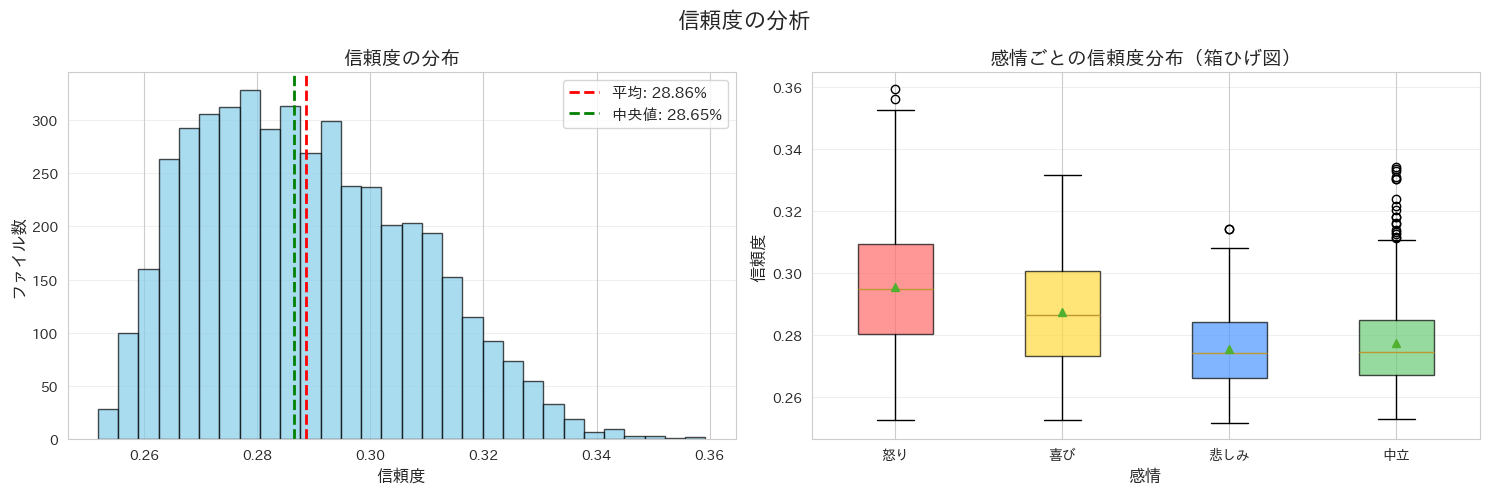


📊 信頼度の統計:
  平均: 28.86%
  中央値: 28.65%
  標準偏差: 1.91%
  最小値: 25.18%
  最大値: 35.92%


In [8]:
# 信頼度の分析
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('信頼度の分析', fontsize=16, fontweight='bold')

# 1. ヒストグラム
ax1 = axes[0]
ax1.hist(df_valid['confidence'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
mean_conf = df_valid['confidence'].mean()
median_conf = df_valid['confidence'].median()
ax1.axvline(mean_conf, color='red', linestyle='--', linewidth=2, label=f'平均: {mean_conf:.2%}')
ax1.axvline(median_conf, color='green', linestyle='--', linewidth=2, label=f'中央値: {median_conf:.2%}')
ax1.set_title('信頼度の分布', fontsize=14, fontweight='bold')
ax1.set_xlabel('信頼度', fontsize=12)
ax1.set_ylabel('ファイル数', fontsize=12)
ax1.legend(fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# 2. 箱ひげ図（感情ごと）
ax2 = axes[1]
box_data = [df_valid[df_valid['dominant_emotion'] == emotion]['confidence'].values 
            for emotion in emotion_counts.index]
bp = ax2.boxplot(box_data, labels=[emotion_labels_jp.get(e, e) for e in emotion_counts.index],
                 patch_artist=True, showmeans=True)
# 色付け
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax2.set_title('感情ごとの信頼度分布（箱ひげ図）', fontsize=14, fontweight='bold')
ax2.set_xlabel('感情', fontsize=12)
ax2.set_ylabel('信頼度', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 統計情報の表示
print("\n📊 信頼度の統計:")
print(f"  平均: {df_valid['confidence'].mean():.2%}")
print(f"  中央値: {df_valid['confidence'].median():.2%}")
print(f"  標準偏差: {df_valid['confidence'].std():.2%}")
print(f"  最小値: {df_valid['confidence'].min():.2%}")
print(f"  最大値: {df_valid['confidence'].max():.2%}")

## 8. ファイルごとの感情スコアヒートマップ

最初の50ファイルの感情スコアをヒートマップで可視化します。

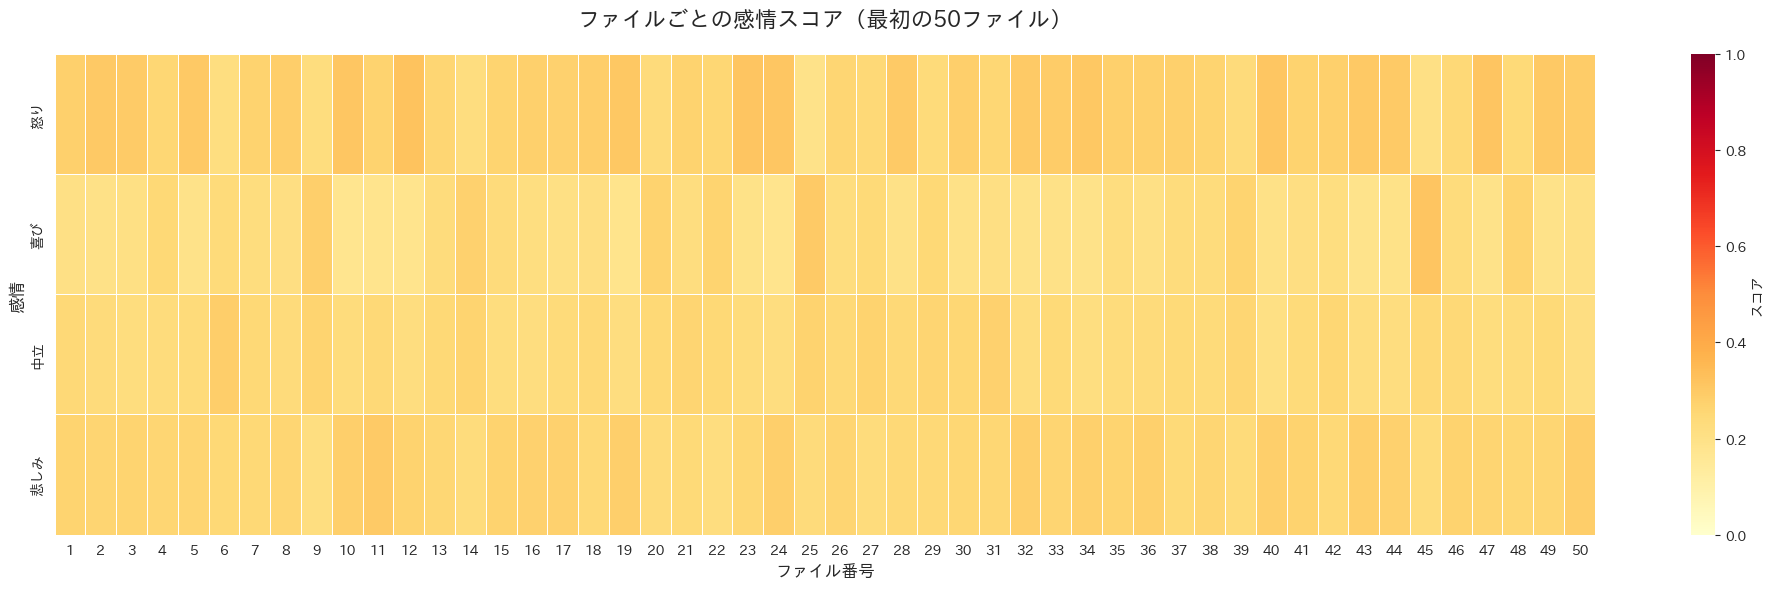

In [9]:
# ヒートマップ用のデータ準備（最初の50ファイル）
n_samples = min(50, len(df_valid))
heatmap_data = df_valid[['angry', 'happy', 'neutral', 'sad']].head(n_samples).T
heatmap_data.columns = [f"{i+1}" for i in range(n_samples)]
heatmap_data.index = [emotion_labels_jp.get(e, e) for e in heatmap_data.index]

plt.figure(figsize=(20, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, cbar_kws={'label': 'スコア'}, 
            vmin=0, vmax=1, linewidths=0.5, linecolor='white')
plt.title(f'ファイルごとの感情スコア（最初の{n_samples}ファイル）', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('ファイル番号', fontsize=12)
plt.ylabel('感情', fontsize=12)
plt.tight_layout()
plt.show()

## 9. 時系列での感情変化（折れ線グラフ）

ファイル順での各感情スコアの変化を可視化します。

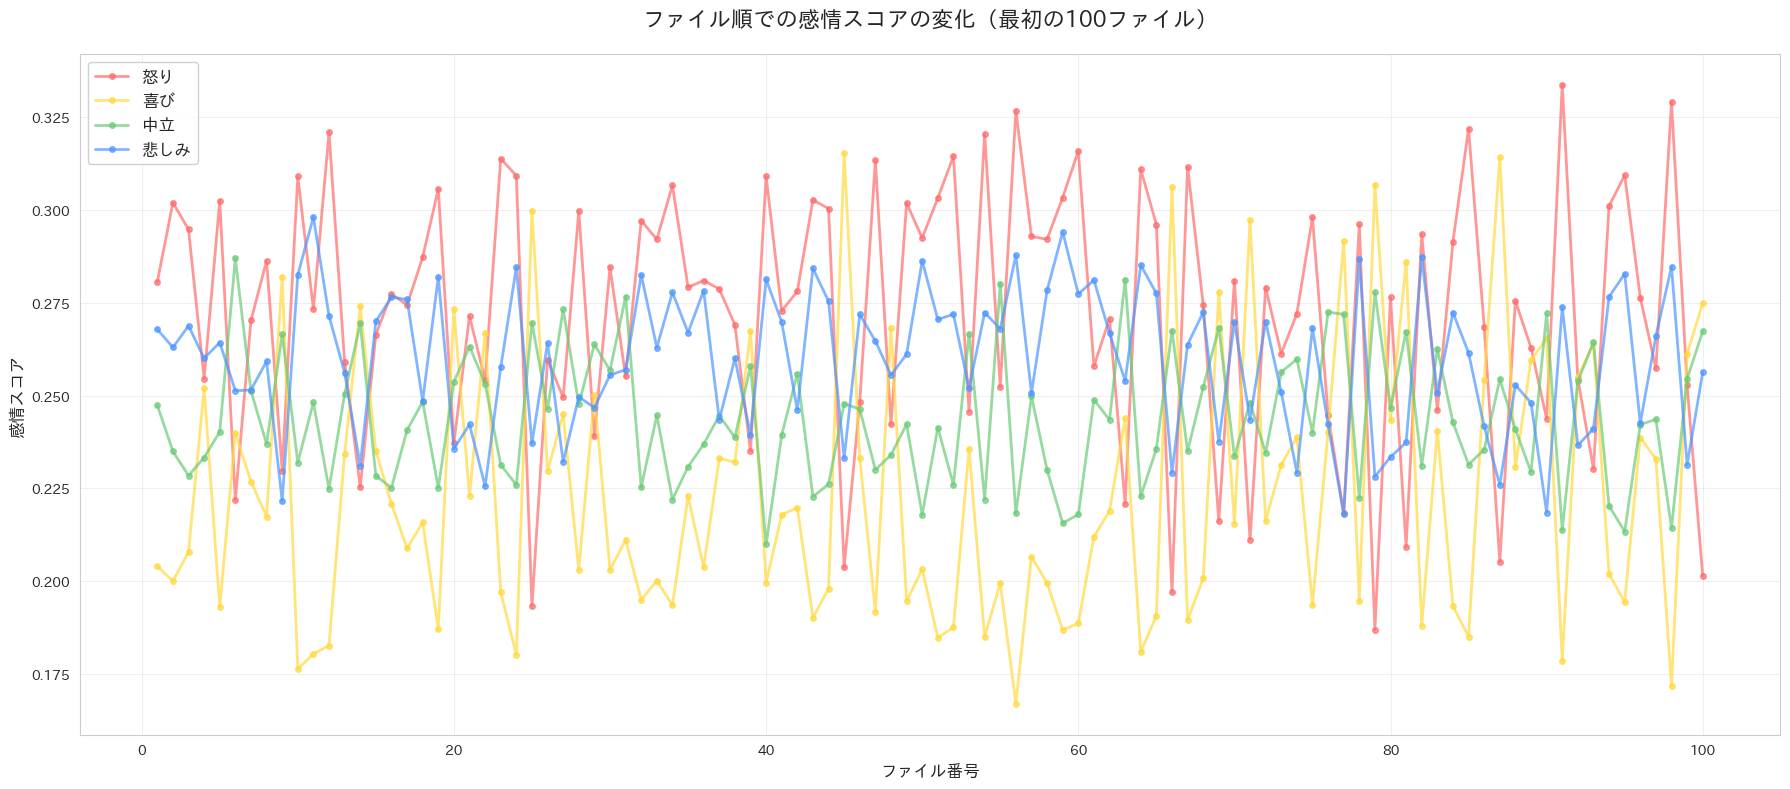

In [10]:
# 時系列グラフ（最初の100ファイル）
n_samples = min(100, len(df_valid))
df_plot = df_valid.head(n_samples).copy()
df_plot['index'] = range(1, n_samples + 1)

plt.figure(figsize=(18, 8))

# 各感情のスコアを折れ線グラフで表示
emotions = ['angry', 'happy', 'neutral', 'sad']

for emotion in emotions:
    plt.plot(df_plot['index'], df_plot[emotion], 
             label=emotion_labels_jp.get(emotion, emotion), 
             color=emotion_colors[emotion], 
             linewidth=2, alpha=0.7, marker='o', markersize=4)

plt.title(f'ファイル順での感情スコアの変化（最初の{n_samples}ファイル）', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('ファイル番号', fontsize=12)
plt.ylabel('感情スコア', fontsize=12)
plt.legend(loc='best', fontsize=12, framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 10. 支配的感情の時系列変化（散布図）

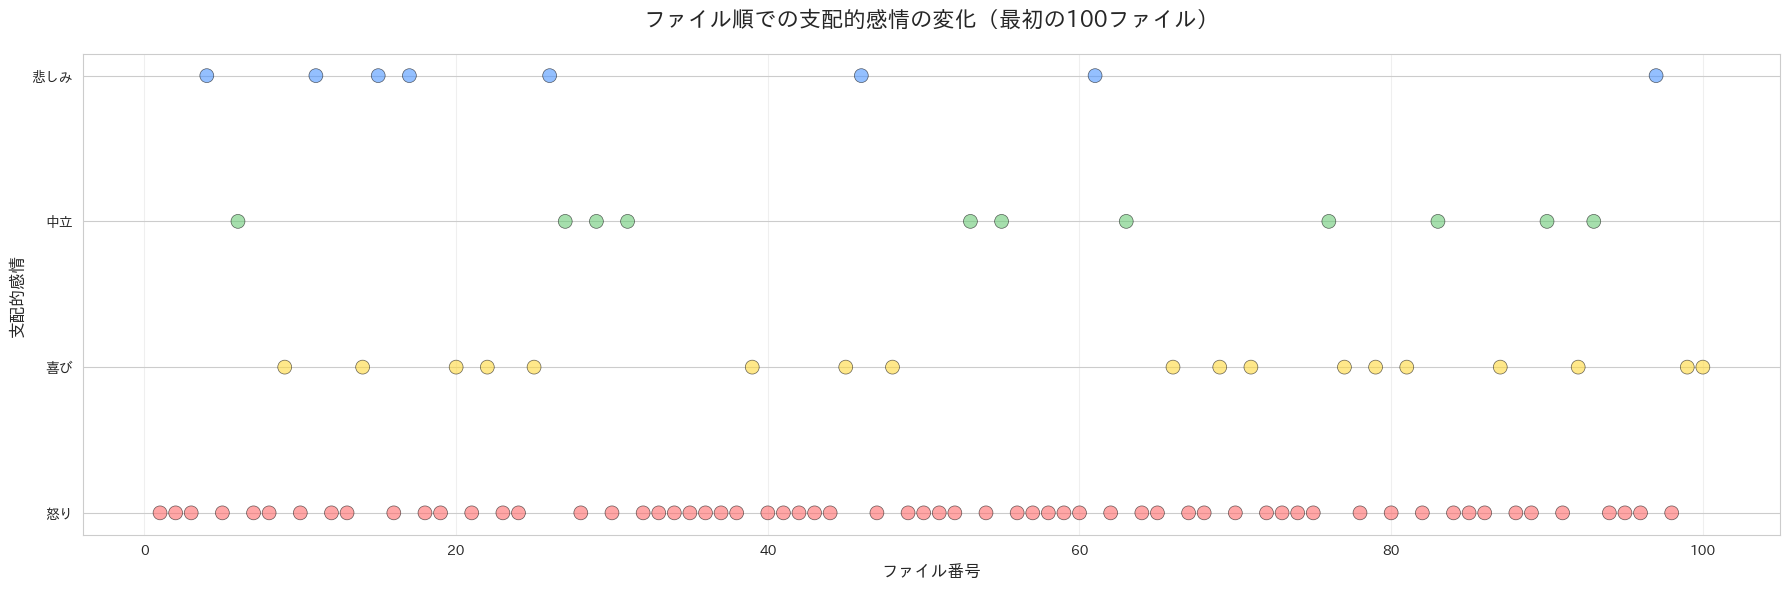

In [11]:
# 支配的感情の時系列変化（最初の100ファイル）
n_samples = min(100, len(df_valid))
df_plot = df_valid.head(n_samples).copy()
df_plot['index'] = range(1, n_samples + 1)

# 感情を数値にマッピング
emotion_to_num = {'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3}
df_plot['emotion_num'] = df_plot['dominant_emotion'].map(emotion_to_num)

plt.figure(figsize=(18, 6))
colors_mapped = [emotion_colors[e] for e in df_plot['dominant_emotion']]
plt.scatter(df_plot['index'], df_plot['emotion_num'], 
           c=colors_mapped, s=100, alpha=0.6, edgecolors='black', linewidth=0.5)

plt.yticks([0, 1, 2, 3], [emotion_labels_jp['angry'], emotion_labels_jp['happy'], 
                           emotion_labels_jp['neutral'], emotion_labels_jp['sad']])
plt.title(f'ファイル順での支配的感情の変化（最初の{n_samples}ファイル）', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('ファイル番号', fontsize=12)
plt.ylabel('支配的感情', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 11. 各感情の代表的なファイル

In [12]:
# 各感情のトップ5ファイル（信頼度が高い順）
print("各感情の代表的なファイル（信頼度上位5件）")
print("="*100)

for emotion in emotion_counts.index:
    emotion_jp = emotion_labels_jp.get(emotion, emotion)
    print(f"\n【{emotion_jp}】")
    print("-"*100)
    
    top_files = df_valid[df_valid['dominant_emotion'] == emotion].nlargest(5, 'confidence')
    
    for idx, (_, row) in enumerate(top_files.iterrows(), 1):
        print(f"{idx}. {row['filename']}")
        print(f"   信頼度: {row['confidence']:.2%}")
        print(f"   スコア: angry={row['angry']:.2%}, happy={row['happy']:.2%}, neutral={row['neutral']:.2%}, sad={row['sad']:.2%}")
        print()

各感情の代表的なファイル（信頼度上位5件）

【怒り】
----------------------------------------------------------------------------------------------------
1. ROHAN4600_0786.wav
   信頼度: 35.92%
   スコア: angry=35.92%, happy=16.94%, neutral=20.64%, sad=26.50%

2. ROHAN4600_4201.wav
   信頼度: 35.61%
   スコア: angry=35.61%, happy=19.29%, neutral=21.48%, sad=23.62%

3. ROHAN4600_1041.wav
   信頼度: 35.25%
   スコア: angry=35.25%, happy=17.11%, neutral=22.37%, sad=25.27%

4. ROHAN4600_3939.wav
   信頼度: 35.09%
   スコア: angry=35.09%, happy=17.33%, neutral=18.75%, sad=28.83%

5. ROHAN4600_0481.wav
   信頼度: 34.97%
   スコア: angry=34.97%, happy=18.12%, neutral=21.94%, sad=24.97%


【喜び】
----------------------------------------------------------------------------------------------------
1. ROHAN4600_0126.wav
   信頼度: 33.16%
   スコア: angry=19.60%, happy=33.16%, neutral=25.61%, sad=21.63%

2. ROHAN4600_2395.wav
   信頼度: 33.11%
   スコア: angry=19.34%, happy=33.11%, neutral=25.16%, sad=22.40%

3. ROHAN4600_2495.wav
   信頼度: 33.11%
   スコア: angry=19.35%